In [2]:
pwd

'C:\\Users\\Baron\\Desktop\\EE_267_Repo\\EE_267\\%PATH_EE267%\\EE267_env\\Assignmnets\\Homework'

In [4]:
cd ..
cd ..

C:\Users\Baron\Desktop\EE_267_Repo\EE_267\%PATH_EE267%\EE267_env


Processing Image 1: pictures/peppers.png


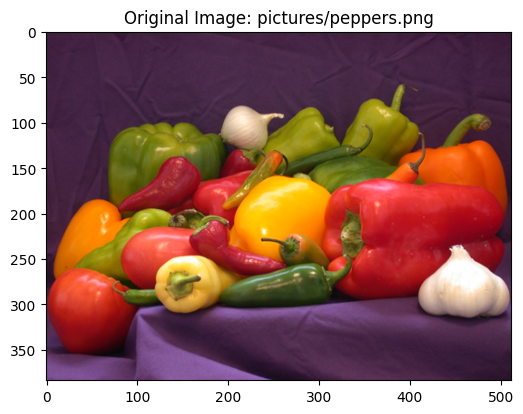

Finished processing pictures/peppers.png
Sample predictions for pictures/peppers.png:
Mask at (0, 0), Top 5 Classes: [945, 950, 943, 951, 519], Probabilities: [0.4407571852207184, 0.16201505064964294, 0.09093864262104034, 0.08871953934431076, 0.029960453510284424]
Mask at (20, 0), Top 5 Classes: [945, 950, 943, 951, 519], Probabilities: [0.48802193999290466, 0.15697982907295227, 0.08246223628520966, 0.0793645903468132, 0.025558939203619957]
Mask at (40, 0), Top 5 Classes: [945, 950, 943, 951, 519], Probabilities: [0.49355825781822205, 0.15521779656410217, 0.0843832865357399, 0.075148805975914, 0.026021704077720642]
Mask at (60, 0), Top 5 Classes: [945, 950, 943, 951, 519], Probabilities: [0.5119860172271729, 0.1541563719511032, 0.07918983697891235, 0.07260646671056747, 0.022961512207984924]
Mask at (80, 0), Top 5 Classes: [945, 950, 943, 951, 519], Probabilities: [0.5537928938865662, 0.13663573563098907, 0.07680448889732361, 0.06720346212387085, 0.022537490352988243]
Processing Image 2

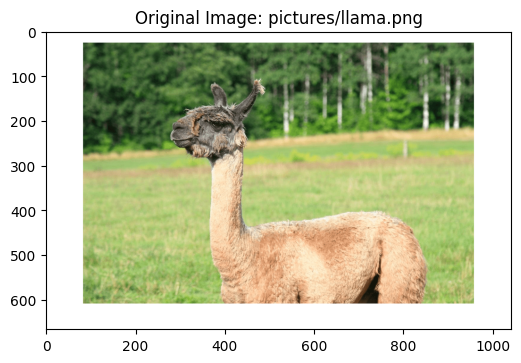

Finished processing pictures/llama.png
Sample predictions for pictures/llama.png:
Mask at (0, 0), Top 5 Classes: [184, 246, 225, 189, 243], Probabilities: [0.18000055849552155, 0.16924621164798737, 0.08574575930833817, 0.07775319367647171, 0.0651417225599289]
Mask at (20, 0), Top 5 Classes: [184, 246, 225, 189, 243], Probabilities: [0.17762739956378937, 0.1767362356185913, 0.08734972029924393, 0.07607894390821457, 0.06466256082057953]
Mask at (40, 0), Top 5 Classes: [246, 184, 225, 189, 243], Probabilities: [0.1788138896226883, 0.17694921791553497, 0.08637923747301102, 0.07761193811893463, 0.06504373252391815]
Mask at (60, 0), Top 5 Classes: [246, 184, 225, 189, 243], Probabilities: [0.18604685366153717, 0.17246326804161072, 0.086174376308918, 0.0776791125535965, 0.06632053852081299]
Mask at (80, 0), Top 5 Classes: [246, 184, 225, 189, 243], Probabilities: [0.1954849809408188, 0.16087058186531067, 0.08372745662927628, 0.07653673738241196, 0.06929199397563934]
Processing complete.


In [11]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define preprocessing transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load pre-trained AlexNet model
model = models.alexnet(pretrained=True)
model.eval()

# Define function to preprocess the image
def preprocess_image(image_path):
    image = Image.open(image_path)
    if image.mode != "RGB":
        image = image.convert("RGB")
    return image

# Define function to mask an image
def mask_image(image, mask_size, position):
    image_np = np.array(image)  # Convert to NumPy
    x, y = position
    image_np[y:y + mask_size, x:x + mask_size, :] = 128  # Apply mask
    return Image.fromarray(image_np)  # Convert back to PIL.Image

# List of image paths
image_files = ["pictures/peppers.png", "pictures/llama.png"]  # Replace with your actual image paths

# Experiment parameters
mask_size = 50  # Size of the mask
step = 20  # Step size for moving the mask

# Perform masking and inference
for idx, image_path in enumerate(image_files):
    print(f"Processing Image {idx + 1}: {image_path}")
    image = preprocess_image(image_path)  # Load and preprocess the image

    predictions = []
    masked_images = []

    for y in range(0, image.size[1] - mask_size, step):
        for x in range(0, image.size[0] - mask_size, step):
            # Mask the image
            masked_img = mask_image(image, mask_size, (x, y))
            masked_images.append(masked_img)

            # Apply transformations to the masked image
            input_tensor = transform(masked_img).unsqueeze(0)
            with torch.no_grad():
                output = model(input_tensor)
                probabilities = torch.nn.functional.softmax(output[0], dim=0)
                top5 = torch.topk(probabilities, 5)
                predictions.append((x, y, top5.indices.tolist(), top5.values.tolist()))

    # Visualization of original and masked areas (optional)
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f"Original Image: {image_path}")
    plt.show()

    print(f"Finished processing {image_path}")

    # Print some predictions for inspection
    print(f"Sample predictions for {image_path}:")
    for pred in predictions[:5]:  # Print first 5 masked predictions
        print(f"Mask at ({pred[0]}, {pred[1]}), Top 5 Classes: {pred[2]}, Probabilities: {pred[3]}")

print("Processing complete.")



Processing Image 1: pictures/peppers.png


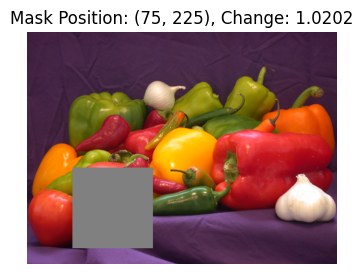

Mask at (75, 225), Change: 1.0202
  Class 945: Probability 0.8970
  Class 943: Probability 0.0554
  Class 950: Probability 0.0124
  Class 951: Probability 0.0061
  Class 738: Probability 0.0028


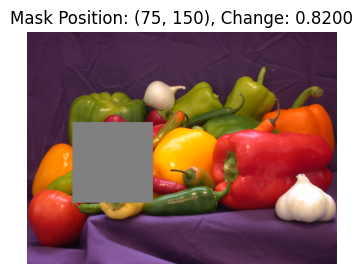

Mask at (75, 150), Change: 0.8200
  Class 945: Probability 0.7854
  Class 943: Probability 0.0725
  Class 950: Probability 0.0334
  Class 951: Probability 0.0322
  Class 790: Probability 0.0069


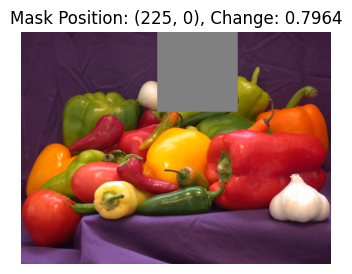

Mask at (225, 0), Change: 0.7964
  Class 945: Probability 0.7845
  Class 950: Probability 0.0674
  Class 943: Probability 0.0484
  Class 951: Probability 0.0284
  Class 876: Probability 0.0114


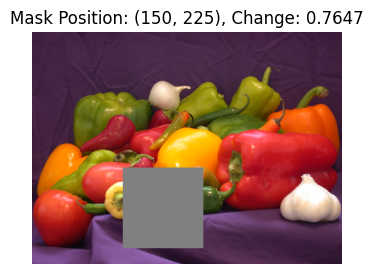

Mask at (150, 225), Change: 0.7647
  Class 945: Probability 0.7391
  Class 943: Probability 0.0831
  Class 950: Probability 0.0445
  Class 951: Probability 0.0341
  Class 968: Probability 0.0095


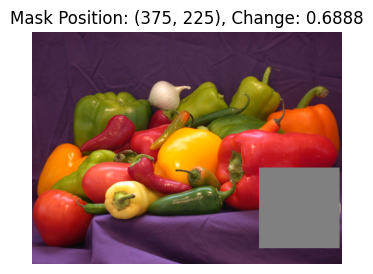

Mask at (375, 225), Change: 0.6888
  Class 945: Probability 0.7035
  Class 943: Probability 0.0662
  Class 951: Probability 0.0464
  Class 950: Probability 0.0413
  Class 790: Probability 0.0177


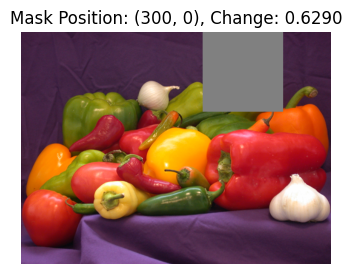

Mask at (300, 0), Change: 0.6290
  Class 945: Probability 0.6771
  Class 943: Probability 0.0698
  Class 950: Probability 0.0579
  Class 951: Probability 0.0500
  Class 954: Probability 0.0196


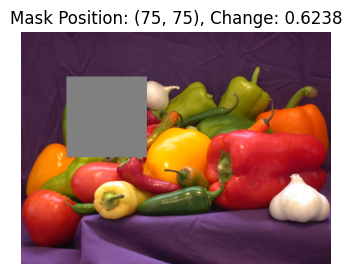

Mask at (75, 75), Change: 0.6238
  Class 945: Probability 0.6383
  Class 943: Probability 0.1117
  Class 951: Probability 0.0498
  Class 950: Probability 0.0476
  Class 736: Probability 0.0301


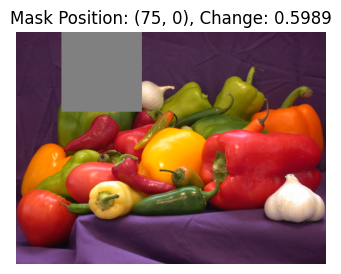

Mask at (75, 0), Change: 0.5989
  Class 945: Probability 0.6727
  Class 943: Probability 0.0918
  Class 950: Probability 0.0822
  Class 951: Probability 0.0403
  Class 876: Probability 0.0164


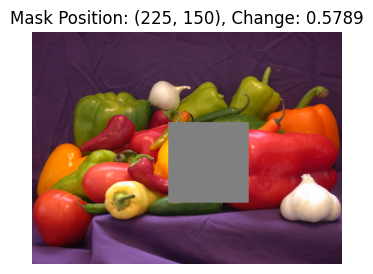

Mask at (225, 150), Change: 0.5789
  Class 945: Probability 0.2709
  Class 951: Probability 0.1025
  Class 943: Probability 0.0985
  Class 736: Probability 0.0885
  Class 950: Probability 0.0779


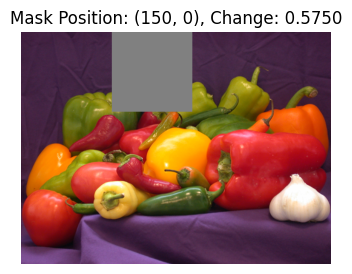

Mask at (150, 0), Change: 0.5750
  Class 945: Probability 0.6681
  Class 950: Probability 0.0900
  Class 943: Probability 0.0688
  Class 951: Probability 0.0478
  Class 954: Probability 0.0185

Processing Image 2: pictures/llama.png


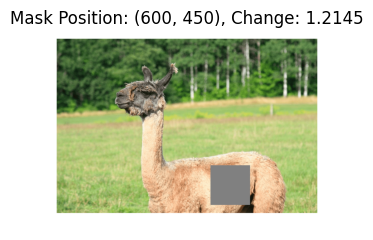

Mask at (600, 450), Change: 1.2145
  Class 189: Probability 0.1879
  Class 183: Probability 0.1335
  Class 184: Probability 0.0695
  Class 181: Probability 0.0616
  Class 355: Probability 0.0537


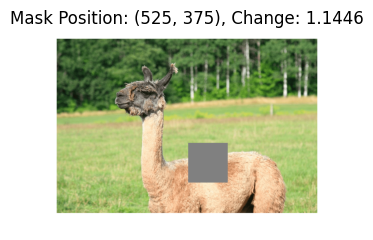

Mask at (525, 375), Change: 1.1446
  Class 189: Probability 0.1382
  Class 183: Probability 0.1185
  Class 202: Probability 0.1170
  Class 184: Probability 0.0529
  Class 191: Probability 0.0442


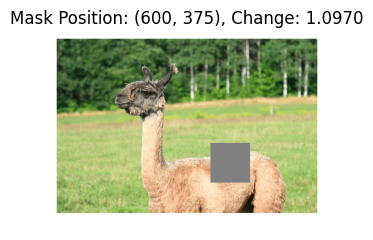

Mask at (600, 375), Change: 1.0970
  Class 189: Probability 0.1413
  Class 183: Probability 0.1375
  Class 202: Probability 0.0838
  Class 184: Probability 0.0711
  Class 355: Probability 0.0611


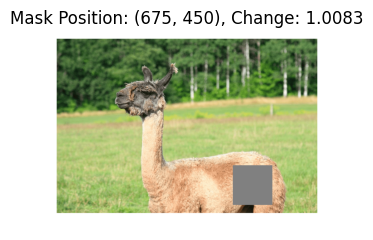

Mask at (675, 450), Change: 1.0083
  Class 355: Probability 0.1492
  Class 189: Probability 0.1412
  Class 184: Probability 0.1191
  Class 183: Probability 0.1013
  Class 331: Probability 0.0575


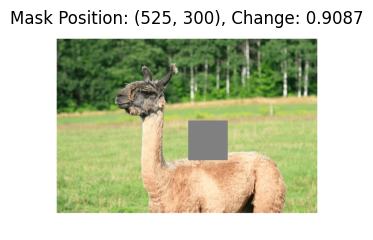

Mask at (525, 300), Change: 0.9087
  Class 189: Probability 0.1874
  Class 202: Probability 0.1736
  Class 184: Probability 0.0986
  Class 355: Probability 0.0856
  Class 186: Probability 0.0577


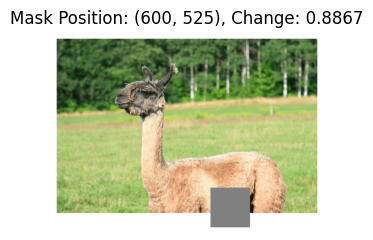

Mask at (600, 525), Change: 0.8867
  Class 189: Probability 0.2808
  Class 184: Probability 0.1570
  Class 202: Probability 0.0920
  Class 182: Probability 0.0641
  Class 183: Probability 0.0624


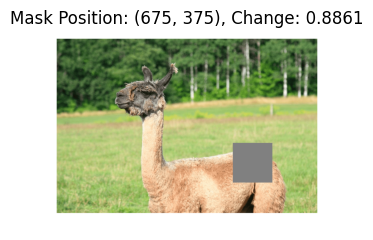

Mask at (675, 375), Change: 0.8861
  Class 189: Probability 0.1188
  Class 355: Probability 0.1050
  Class 184: Probability 0.1036
  Class 183: Probability 0.1002
  Class 202: Probability 0.0990


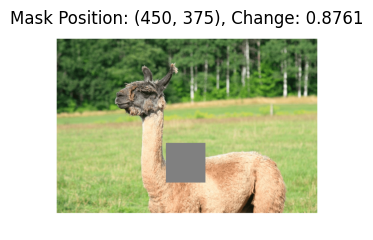

Mask at (450, 375), Change: 0.8761
  Class 202: Probability 0.1462
  Class 184: Probability 0.1087
  Class 189: Probability 0.1029
  Class 183: Probability 0.0750
  Class 191: Probability 0.0452


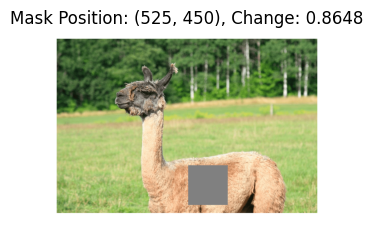

Mask at (525, 450), Change: 0.8648
  Class 189: Probability 0.2303
  Class 184: Probability 0.1331
  Class 183: Probability 0.0862
  Class 202: Probability 0.0722
  Class 182: Probability 0.0403


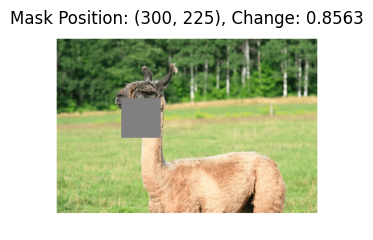

Mask at (300, 225), Change: 0.8563
  Class 355: Probability 0.3616
  Class 184: Probability 0.1453
  Class 185: Probability 0.0781
  Class 189: Probability 0.0608
  Class 225: Probability 0.0459
Processing complete.


In [20]:
import torch
import torchvision.transforms as transforms

import torchvision.models as models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define preprocessing transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load pre-trained AlexNet model
model = models.alexnet(pretrained=True)
model.eval()

# Define function to preprocess the image
def preprocess_image(image_path):
    image = Image.open(image_path)
    if image.mode != "RGB":
        image = image.convert("RGB")
    return image

# Define function to mask an image
def mask_image(image, mask_size, position):
    image_np = np.array(image)  # Convert to NumPy
    x, y = position
    image_np[y:y + mask_size, x:x + mask_size, :] = 128  # Apply mask
    return Image.fromarray(image_np)  # Convert back to PIL.Image

# List of image paths
image_files = ["pictures/peppers.png", "pictures/llama.png"]  # Replace with your actual image paths

# Experiment parameters
#mask_size = 100  # Size of the mask
mask_size = int(0.2 * min(image.size))  # Mask is 20% of the smallest dimension
step = 75  # Step size for moving the mask
max_outputs = 10  # Maximum number of masked images to display

# Perform masking and inference
for idx, image_path in enumerate(image_files):
    print(f"\nProcessing Image {idx + 1}: {image_path}")
    image = preprocess_image(image_path)  # Load and preprocess the image

    # Get predictions for the original image
    original_tensor = transform(image).unsqueeze(0)
    with torch.no_grad():
        original_output = model(original_tensor)
        original_probabilities = torch.nn.functional.softmax(original_output[0], dim=0)
        original_top5_indices = torch.topk(original_probabilities, 5).indices.tolist()
        original_top5_probs = torch.topk(original_probabilities, 5).values.tolist()

    # Store masks and their prediction changes
    significant_masks = []

    for y in range(0, image.size[1] - mask_size, step):
        for x in range(0, image.size[0] - mask_size, step):
            # Mask the image
            masked_img = mask_image(image, mask_size, (x, y))

            # Apply transformations to the masked image
            input_tensor = transform(masked_img).unsqueeze(0)
            with torch.no_grad():
                masked_output = model(input_tensor)
                masked_probabilities = torch.nn.functional.softmax(masked_output[0], dim=0)

            # Measure the prediction change (e.g., L1 norm difference)
            diff = torch.abs(original_probabilities - masked_probabilities).sum().item()

            # Store the masked image, its position, and the difference
            significant_masks.append((masked_img, (x, y), diff, masked_probabilities))

    # Sort masks by the largest prediction changes
    significant_masks = sorted(significant_masks, key=lambda x: x[2], reverse=True)[:max_outputs]

    # Display the top significant masks
    for i, (masked_img, position, diff, masked_probabilities) in enumerate(significant_masks):
        # Get top-5 predictions for the masked image
        top5_indices = torch.topk(masked_probabilities, 5).indices.tolist()
        top5_probs = torch.topk(masked_probabilities, 5).values.tolist()

        # Display the masked image
        plt.figure(figsize=(4, 4))
        plt.imshow(masked_img)
        plt.axis('off')
        plt.title(f"Mask Position: {position}, Change: {diff:.4f}")
        plt.show()

        # Print predictions
        print(f"Mask at {position}, Change: {diff:.4f}")
        for j, (index, prob) in enumerate(zip(top5_indices, top5_probs)):
            print(f"  Class {index}: Probability {prob:.4f}")

print("Processing complete.")


In [17]:
from PIL import Image

def check_image_size(image_path):
    """
    Checks the dimensions (width and height) of an image.

    Args:
        image_path (str): Path to the image file.

    Returns:
        tuple: Width and height of the image.
    """
    try:
        # Open the image
        with Image.open(image_path) as img:
            width, height = img.size
            print(f"The dimensions of the image are {width}x{height} pixels.")
            return width, height
    except Exception as e:
        print(f"Error: {e}")
        return None


In [18]:
# Example usage
llama_pic = "pictures/peppers.png"  # Replace with the path to your imag = "your_image.jpg"  # Replace with the path to your image
peppers_pic = "pictures/llama.png"  # Replace wpictures/peppers.pngith the path to your imag = "your_image.jpg"  # Replace with the path to your image

check_image_size(image_path)
check_image_size(image_path)

The dimensions of the image are 1042x667 pixels.
The dimensions of the image are 1042x667 pixels.


(1042, 667)

Processing image: pictures/peppers.png


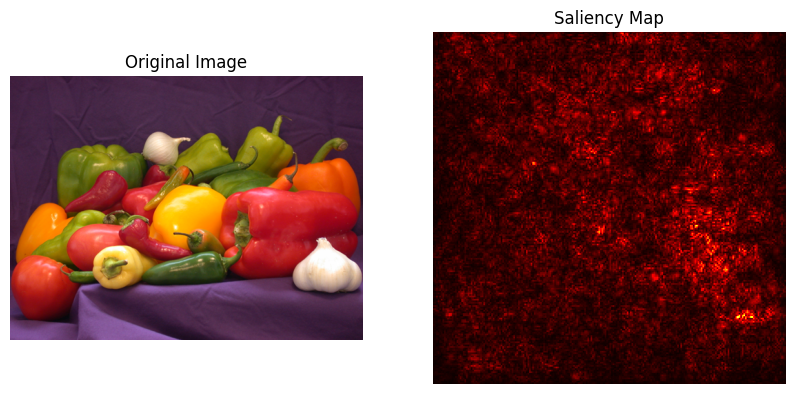

Processing image: pictures/llama.png


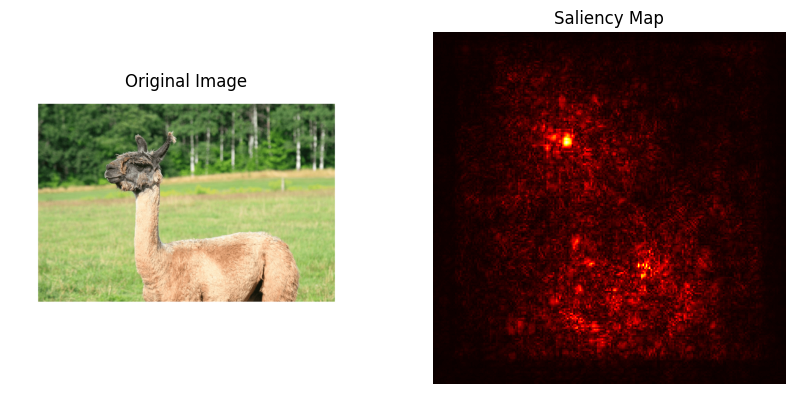

In [22]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import matplotlib.pyplot as plt

# Define preprocessing transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load pre-trained AlexNet model
model = models.alexnet(pretrained=True)
model.eval()

# Function to preprocess the image
def preprocess_image(image_path):
    image = Image.open(image_path)
    if image.mode != "RGB":
        image = image.convert("RGB")
    input_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    return input_tensor, image

# Function to compute saliency map
def compute_saliency_map(model, input_tensor, target_class=None):
    input_tensor.requires_grad_()  # Enable gradient computation
    output = model(input_tensor)  # Forward pass

    if target_class is None:
        target_class = torch.argmax(output, dim=1).item()  # Use the top predicted class

    # Get the score for the target class
    score = output[0, target_class]
    model.zero_grad()  # Zero gradients
    score.backward()  # Backpropagate

    # Get the saliency map
    saliency_map = input_tensor.grad.data.abs().squeeze().max(dim=0)[0]
    return saliency_map

# Function to visualize the saliency map
def visualize_saliency(image, saliency_map, title):
    plt.figure(figsize=(10, 5))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title("Original Image")

    # Saliency map
    plt.subplot(1, 2, 2)
    plt.imshow(saliency_map.cpu().numpy(), cmap='hot')
    plt.axis('off')
    plt.title(title)

    plt.show()

# List of image paths
image_files = ["pictures/peppers.png", "pictures/llama.png"]  # Replace with actual image paths

# Process each image and generate saliency map
for idx, image_path in enumerate(image_files):
    print(f"Processing image: {image_path}")
    
    # Preprocess the image
    input_tensor, original_image = preprocess_image(image_path)
    
    # Compute the saliency map
    saliency_map = compute_saliency_map(model, input_tensor)
    
    # Visualize the saliency map
    visualize_saliency(original_image, saliency_map, title="Saliency Map")
